In [ ]:

import matplotlib.pyplot as plt
from sequana import FastQC, PacbioSubreads

qc = FastQC("ATBI_Exercise1_R1.fastq", verbose=True)
plt.figure(figsize=(20,10))
qc.boxplot_quality()
plt.title("Quality scores across all byses\nForward Reads")
plt.show()
qc = FastQC("ATBI_Exercise1_R2.fastq", verbose=True)
plt.figure(figsize=(20,10))
qc.boxplot_quality()
plt.title("Quality scores across all byses\nForward Reads")
plt.show()

In [ ]:
!bowtie2-build reference.fasta index_name

# Step 2: Align reads to the indexed reference using Bowtie2
!bowtie2 -x index_name -1 ATBI_Exercise1_R1.fastq -2 ATBI_Exercise1_R2.fastq -S output.sam

# Step 3: Convert SAM to BAM using Samtools
!samtools view -bS output.sam > output.bam

# Step 4: Check read statistics using samtools flagstat
!samtools flagstat output.bam
!samtools flagstat output.bam

In [26]:
import GEOparse
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt



gse_name = "GSE28078"
gse = GEOparse.get_GEO(geo=gse_name, destdir="./")

gse.metadata




{'title': ['mRNA-Seq of whole flies from Drosophila'],
 'geo_accession': ['GSE28078'],
 'status': ['Public on Mar 23 2011'],
 'submission_date': ['Mar 21 2011'],
 'last_update_date': ['May 15 2019'],
 'pubmed_id': ['21179090'],
 'summary': ['We sequenced mRNA from whole flies of females and male of Drosophila melanogaster, D. simulans, D. yakuba, D. ananassae, D. pseudobscura, D. mojavensis, and D. virilis as part of the modENCODE project to validate novel gene models found in D. melanogaster, identify genes differentially expressed between the sexes and sex-specific alternative splicing events, and examine the evolution of gene expression.'],
 'overall_design': ['Comparison of expresssion profiles in female and male whole flies. These are the same samples used to generate the array data found in GSE6640.'],
 'type': ['Expression profiling by high throughput sequencing'],
 'contributor': ['John,H,Malone',
  'Carlo,G,Artieri',
  'David,,Sturgill',
  'Yu,,Zhang',
  'Brian,,Oliver'],
 'sa

Index(['Characteristics[organism]', 'Characteristics[age]', 'Unit[time unit]',
       'Characteristics[developmental stage]', 'Characteristics[sex]',
       'Characteristics[disease]', 'Characteristics[organism part]',
       'Characteristics[cell type]', 'Characteristics[individual]',
       'Characteristics[body mass index]', 'Characteristics[cohort]',
       'Material Type', 'Protocol REF', 'Protocol REF.1', 'Protocol REF.2',
       'Protocol REF.3', 'Extract Name', 'Protocol REF.4',
       'Labeled Extract Name', 'Label', 'Protocol REF.5', 'Assay Name',
       'Technology Type', 'Array Design REF', 'Term Source REF',
       'Protocol REF.6', 'Array Data File', 'Protocol REF.7',
       'Derived Array Data File', 'Factor Value[clinical information]',
       'Factor Value[cohort]'],
      dtype='object')


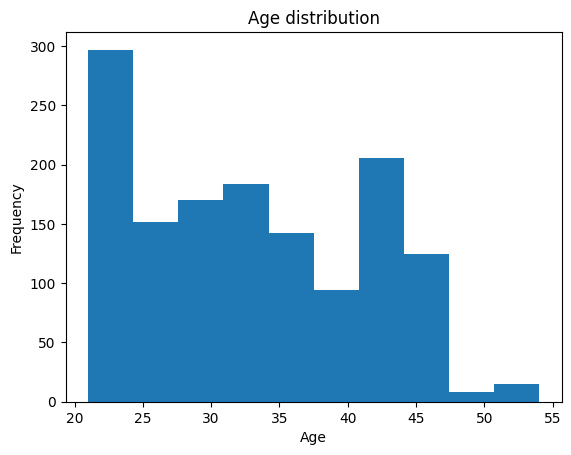

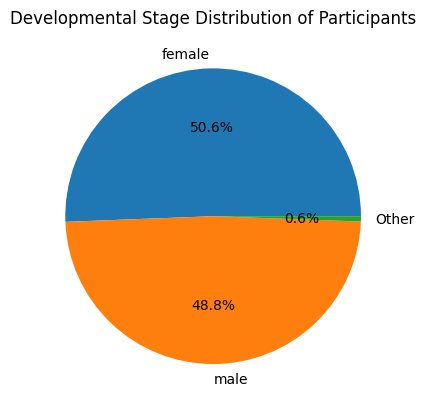

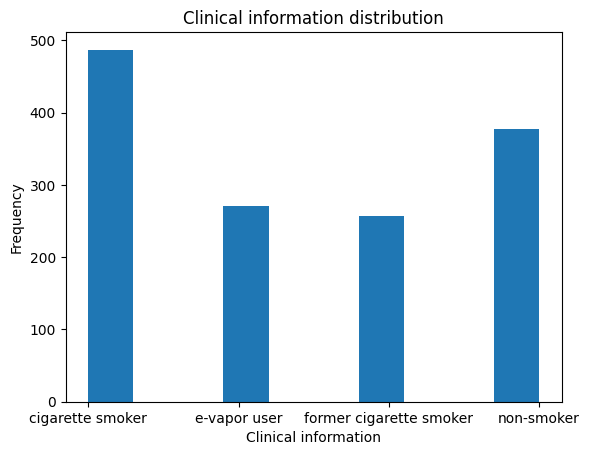

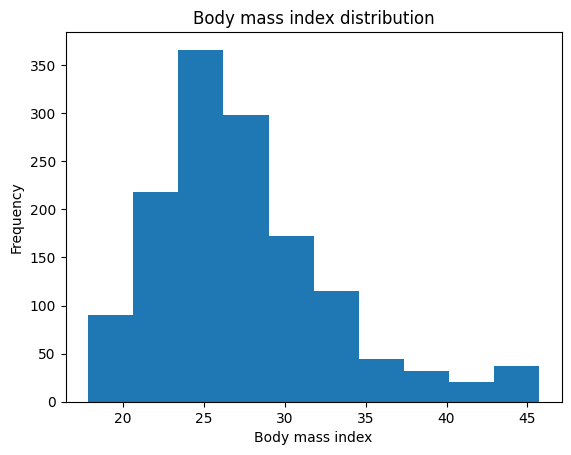

In [22]:
import GEOparse
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


platform_file = "a.txt"
# check that file exists
import os
assert os.path.exists(platform_file)


df = pd.read_csv(platform_file, sep="\t", index_col=0)

# describe the dataset (incl. descriptive statistics – e.g., age distribution, distribution by gender, overall survival etc.)
df.describe()


print(df.columns)

# plot hist for age distribution
plt.hist(df['Characteristics[age]'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# plot hist for sex distribution
plt.pie(df['Characteristics[sex]'].value_counts(), labels=df['Characteristics[sex]'].value_counts().index, autopct='%1.1f%%')

plt.title('Developmental Stage Distribution of Participants')

plt.show()
           
           
# Factor Value[clinical information]
plt.hist(df['Factor Value[clinical information]'])
plt.title('Clinical information distribution')
plt.xlabel('Clinical information')
plt.ylabel('Frequency')
plt.show()

# plot overall Characteristics[body mass index]
plt.hist(df['Characteristics[body mass index]'])
plt.title('Body mass index distribution')
plt.xlabel('Body mass index')
plt.ylabel('Frequency')
plt.show()

